In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
data = pd.read_csv('/content/sample_data/NOK.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,5.95,6.06,5.93,6.04,5.592633,48348500
1,2018-12-13,5.98,6.05,5.97,6.03,5.583373,31790800
2,2018-12-14,5.91,6.01,5.89,5.94,5.500039,17796500
3,2018-12-17,5.94,5.95,5.85,5.87,5.435223,26578100
4,2018-12-18,5.88,5.90,5.76,5.78,5.351890,19722400
...,...,...,...,...,...,...,...
1253,2023-12-05,2.96,3.04,2.94,3.00,3.000000,44622900
1254,2023-12-06,3.05,3.09,3.01,3.01,3.010000,30193200
1255,2023-12-07,3.05,3.12,3.02,3.10,3.100000,24122200
1256,2023-12-08,3.19,3.22,3.16,3.18,3.180000,14533600


In [39]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [40]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [41]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = len(scaled_prices) - train_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]


In [42]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [44]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [45]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.1840
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 13/100
13/13 [=================

In [46]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)


# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

9/9 [==============================] - 0s 2ms/step


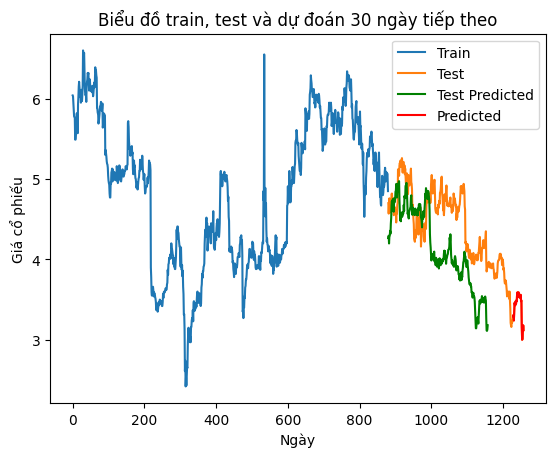

In [47]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
#plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [48]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1228    3.29
1229    3.31
1230    3.24
1231    3.35
1232    3.46
1233    3.43
1234    3.43
1235    3.48
1236    3.45
1237    3.49
1238    3.48
1239    3.57
1240    3.59
1241    3.54
1242    3.56
1243    3.59
1244    3.53
1245    3.53
1246    3.55
1247    3.54
1248    3.52
1249    3.56
1250    3.48
1251    3.49
1252    3.16
1253    3.00
1254    3.01
1255    3.10
1256    3.18
1257    3.12
Name: Close, dtype: float64


In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)


# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test = scaler.inverse_transform(y_test)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)


9/9 [==============================] - 0s 2ms/step


In [50]:
mape_test *= 100
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


MAPE: 2.048
MAE: 0.086
RMSE: 0.113
-------------------
